# Lorenz Equations

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation as FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

In [2]:
%matplotlib notebook

# QUINLAN PLEASE READ THIS BEFORE YOU GRADE MY LAB:
## The axes on my figures for problems 3, 4 and 5 do not display what I have set them to be. In his office hours, Bryce and I tried to fix it and we could not, we tried clearing the plots before and other things to try to fix it, etc. SO Bryce told me to put a note at the top of my lab explaining this. I have labelled the axes and titles of the graphs correctly if you look at my code, they are just getting messed up somehow for some reason we couldn't figure out when I actually display the figures. 
## Thank you!


## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8/3$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy.integrate.solve_ivp` to compute the solution.

In [3]:
def lorenz(t, x):
    """Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        t (float): The time value t
        x ((3,) ndarray): The state values (x,y,z)
    Returns:
        ((3,) ndarray): The derivative values
    """
    #this function is like the ode(t, y) func that we always have when use solve_ivp
    sig = 10
    rho = 28
    beta = 8/3
    
    return np.array([sig*(x[1] - x[0]), rho*x[0]-x[1]-x[0]*x[2], x[0]*x[1]-beta*x[2]])

<IPython.core.display.Javascript object>


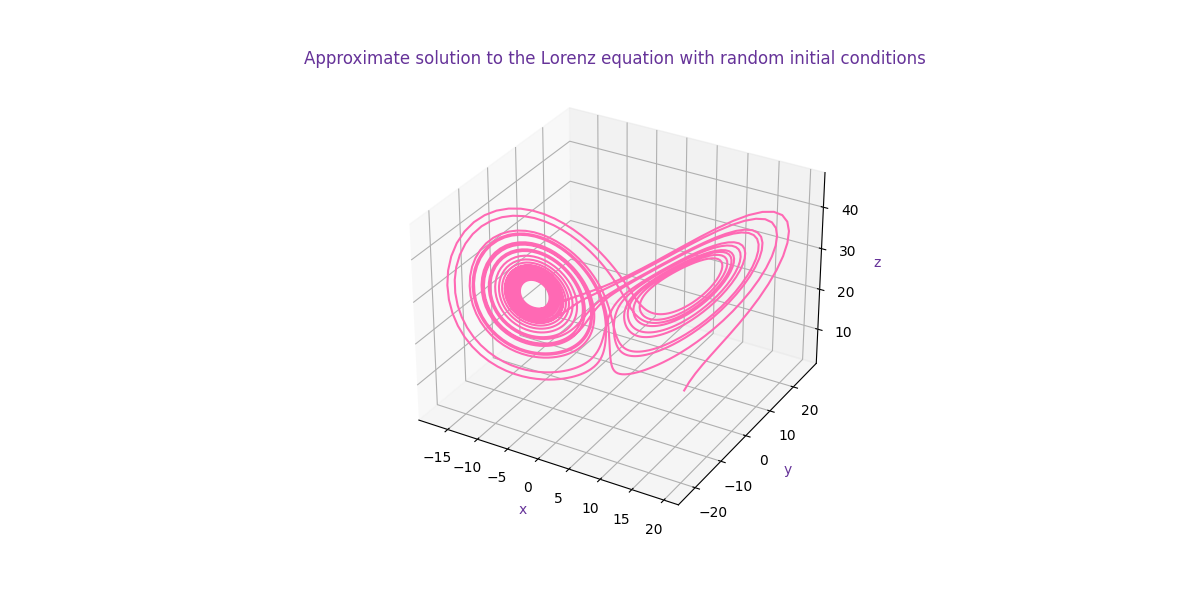

In [4]:
#want use solve_ivp so need t_span, init condt and need solve system:
t_span = (0, 25)

#want each init condt for x,y,z to be drawn randomly from uniform distrib from -15 to 15:
x0 = np.random.uniform(-15, 15, size = 3) #size = 3 makes it 3D, makes a random uniform initial condt of x,y,z 

#now solve system:
sol = solve_ivp(lorenz, t_span, x0, max_step = 0.01)

#make 3D plot of solution to Lorenz equations now:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

fig.set_figheight(6) #use these next 2 lines to make the graphs bigger
fig.set_figwidth(12)

ax.plot(sol.y[0], sol.y[1], sol.y[2], color = "hotpink") #sol.y gives you x,y,z 
ax.set_xlabel('x', color = "rebeccapurple")
ax.set_ylabel('y', color = "rebeccapurple")
ax.set_zlabel('z', color = "rebeccapurple")
ax.set_title("Approximate solution to the Lorenz equation with random initial conditions", color = "rebeccapurple")
    
plt.show()

## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

<IPython.core.display.Javascript object>


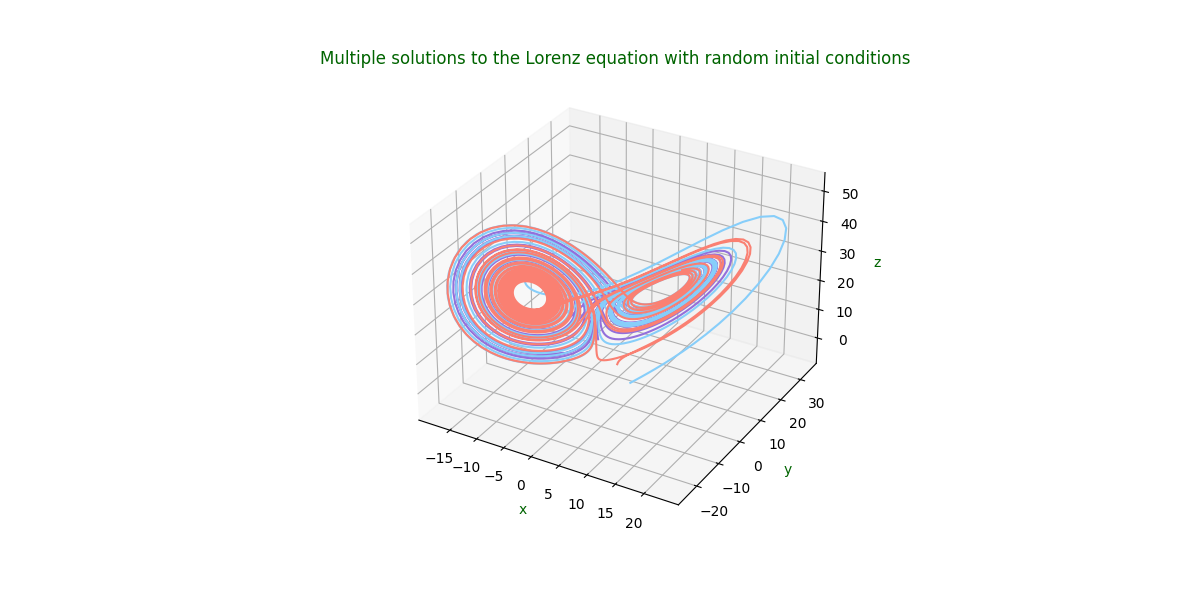

In [40]:
#want 3 different solutions:
x0_1 = np.random.uniform(-15, 15, size = 3) #size = 3 makes it 3D, makes a random uniform initial condt of x,y,z 
x0_2 = np.random.uniform(-15, 15, size = 3) 
x0_3 = np.random.uniform(-15, 15, size = 3)

#now solve system:
sol_1 = solve_ivp(lorenz, t_span, x0_1, max_step = 0.01)
sol_2 = solve_ivp(lorenz, t_span, x0_2, max_step = 0.01)
sol_3 = solve_ivp(lorenz, t_span, x0_3, max_step = 0.01)

#make 3D plot of solution to Lorenz equations now:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

fig.set_figheight(6) #use these next 2 lines to make the graphs bigger
fig.set_figwidth(12)

ax.plot(sol_1.y[0], sol_1.y[1], sol_1.y[2], color = "mediumpurple") #sol.y gives you x,y,z 
ax.plot(sol_2.y[0], sol_2.y[1], sol_2.y[2], color = "lightskyblue") 
ax.plot(sol_3.y[0], sol_3.y[1], sol_3.y[2], color = "salmon")

ax.set_xlabel('x', color = "darkgreen")
ax.set_ylabel('y', color = "darkgreen")
ax.set_zlabel('z', color = "darkgreen")
ax.set_title("Multiple solutions to the Lorenz equation with random initial conditions", color = "darkgreen")
    
plt.show()

## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4`.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

`<video src='lorenz_animation1.mp4' controls>`

<IPython.core.display.Javascript object>


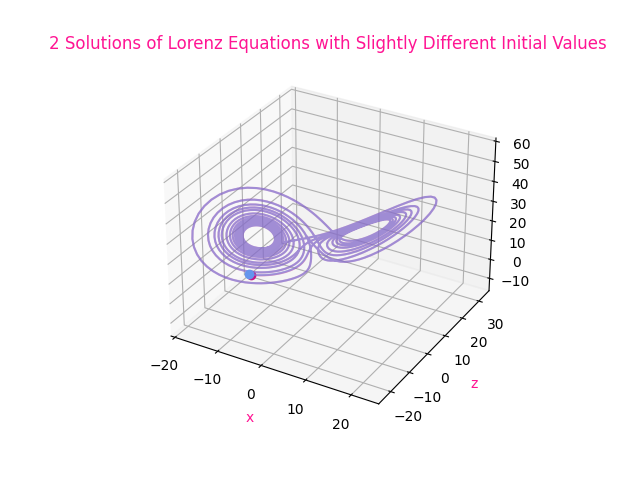

In [5]:
#get the 2 initial conditions for the 2 solutions want to find:
x0_1 = np.random.uniform(-15, 15, size = 3)
x0_2 = x0_1 + np.random.randn(3)*(1e-5)  #get 2nd initial condt by adding small perturbation to 1st sol

#now get the 2 solutions:
sol_1 = solve_ivp(lorenz, t_span, x0_1, max_step = 0.01)
sol_2 = solve_ivp(lorenz, t_span, x0_2, max_step = 0.01)

#now make the 3D animation of the 2 solutions:
#need the update function for when make the 3D animation:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlim((-20, 25))   #change limits on x,y,z to reflect figure 6.2 that it's supposed to match
ax.set_ylim((-25, 35))    
ax.set_zlim((-15, 60)) 

#set up the particles, trajectories for the 2 solutions:
particle_1, = plt.plot([],[],[], marker='o', color='mediumvioletred', label = "solution 1")
traj_1, = plt.plot([],[],[], color='mediumvioletred', alpha=0.5)    
particle_2, = plt.plot([],[],[], marker='o', color='cornflowerblue', label = "solution 2")
traj_2, = plt.plot([],[],[], color='cornflowerblue', alpha=0.5)

def update(i):
    #get x,y,z for each solution:
    particle_1.set_data(sol_1.y[0, i], sol_1.y[1, i])  #set x, y particle coords w/ set_data
    particle_1.set_3d_properties(sol_1.y[2, i])        #set z particle coord w/ set_3d_prop
    traj_1.set_data(sol_1.y[0, :i+1], sol_1.y[1, :i+1])  #x,y trajectory for 1st sol
    traj_1.set_3d_properties(sol_1.y[2, :i+1])         #z traj for 1st sol
    
    
    particle_2.set_data(sol_2.y[0, i], sol_2.y[1, i])  #set x, y part coords w/ set_data
    particle_2.set_3d_properties(sol_2.y[2, i])        #set z part coord w/ set_3d_prop
    traj_2.set_data(sol_2.y[0, :i+1], sol_2.y[1, :i+1])  #x,y trajectory for 1st sol
    traj_2.set_3d_properties(sol_2.y[2, :i+1])         #z traj for 1st sol
    
    ax.set_xlabel("x", color = "deeppink")
    ax.set_ylabel("y", color = "deeppink")
    ax.set_ylabel("z", color = "deeppink")
    
    return [particle_1, traj_1], [particle_2, traj_2] 

plt.title("2 Solutions of Lorenz Equations with Slightly Different Initial Values", color = "deeppink")
    
#now create the actual animation:
ani = animation.FuncAnimation(fig, update, frames=range(len(sol_1.y[0])), interval=3)  #create FuncAnimation object to make animation
animation.writer = animation.writers['ffmpeg'] #specify using ffmpeg
ani.save('lorenz_animation1.mp4') #save animation as file

plt.show()

#dipslay the video from the file now 
<video src="lorenz_animation1.mp4" controls>

<video src="lorenz_animation1.mp4" controls>

## Problem 4
The `solve_ivp` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the `solve_ivp` arguments `(atol=1e-15, rtol=1e-13)` for the first approximation and `(atol=1e-12, rtol=1e-10)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4`.

<IPython.core.display.Javascript object>


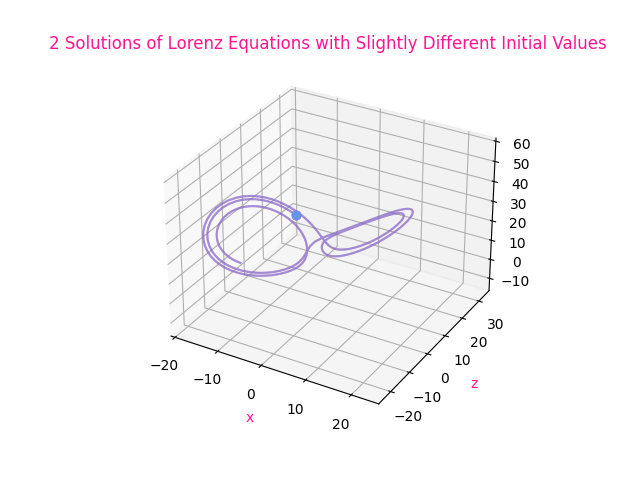

In [6]:
#get the initial condition want:
x0_1 = np.random.uniform(-15, 15, size = 3)

t_span = (0, 50)  #need change this to be 50 bc they dont separate until around 30 seconds in
t_eval = np.linspace(0, 50, 3000)

#now get the 2 solutions:
sol_1 = solve_ivp(lorenz, t_span, x0_1, t_eval = t_eval, atol = 1e-15, rtol = 1e-13)
sol_2 = solve_ivp(lorenz, t_span, x0_1, t_eval = t_eval, atol = 1e-12, rtol = 1e-10)

#now make the 3D animation of the 2 solutions:
#need the update function for when make the 3D animation:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlim((-20, 25))   #change limits on x,y,z to reflect figure 6.2 that it's supposed to match
ax.set_ylim((-25, 35))    
ax.set_zlim((-15, 60)) 

#set up the particles, trajectories for the 2 solutions:
particle_1, = plt.plot([],[],[], marker='o', color='mediumvioletred', label = "solution 1")
traj_1, = plt.plot([],[],[], color='mediumvioletred', alpha=0.5)    
particle_2, = plt.plot([],[],[], marker='o', color='cornflowerblue', label = "solution 2")
traj_2, = plt.plot([],[],[], color='cornflowerblue', alpha=0.5)

def update(i):
    #get x,y,z for each solution:
    particle_1.set_data(sol_1.y[0, i], sol_1.y[1, i])  #set x, y particle coords w/ set_data
    particle_1.set_3d_properties(sol_1.y[2, i])        #set z particle coord w/ set_3d_prop
    traj_1.set_data(sol_1.y[0, :i+1], sol_1.y[1, :i+1])  #x,y trajectory for 1st sol
    traj_1.set_3d_properties(sol_1.y[2, :i+1])         #z traj for 1st sol
    
    
    particle_2.set_data(sol_2.y[0, i], sol_2.y[1, i])  #set x, y part coords w/ set_data
    particle_2.set_3d_properties(sol_2.y[2, i])        #set z part coord w/ set_3d_prop
    traj_2.set_data(sol_2.y[0, :i+1], sol_2.y[1, :i+1])  #x,y trajectory for 1st sol
    traj_2.set_3d_properties(sol_2.y[2, :i+1])         #z traj for 1st sol
    
    ax.set_xlabel("x", color = "deeppink")
    ax.set_ylabel("y", color = "deeppink")
    ax.set_ylabel("z", color = "deeppink")
    
    return [particle_1, traj_1], [particle_2, traj_2] 

plt.title("2 Solutions of Lorenz Equations with Slightly Different Initial Values", color = "deeppink")
    
#now create the actual animation:
ani = animation.FuncAnimation(fig, update, frames=range(len(sol_1.y[0])), interval=10)  #create FuncAnimation object to make animation
animation.writer = animation.writers['ffmpeg'] #specify using ffmpeg
ani.save('lorenz_animation2.mp4') #save animation as file

plt.show()

#dipslay the video from the file now 
<video src="lorenz_animation2.mp4" controls>

<video src="lorenz_animation2.mp4" controls>

## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by using a random "dummy" initial condition, approximating the resulting solution to the Lorenz system for a short time, and then using the endpoint of that solution (which is now on the attractor) as the desired intital condition.
* Produce a second initial condition by adding a small perturbation to the first (as before).
* For both initial conditions, use `solve_ivp` to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the vector difference between the two solutions for each value of $t$.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Produce a plot similar to Figure 6.3 using `plt.semilogy`.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, the best-fit exponential can be plotted using `plt.semilogy(t,np.exp(a*t+b))`.

ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x7f699104bf40>>
Traceback (most recent call last):
  File "/home/jeslagle/.local/lib/python3.8/site-packages/tornado/ioloop.py", line 905, in _run
    return self.callback()
  File "/home/jeslagle/.local/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 1216, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/jeslagle/.local/lib/python3.8/site-packages/matplotlib/animation.py", line 1477, in _step
    still_going = super()._step(*args)
  File "/home/jeslagle/.local/lib/python3.8/site-packages/matplotlib/animation.py", line 1189, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/jeslagle/.local/lib/python3.8/site-packages/matplotlib/animation.py", line 1208, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/jeslagle/.local/lib/python3.8/site-packages/matplotlib/animation.py", line 

<IPython.core.display.Javascript object>


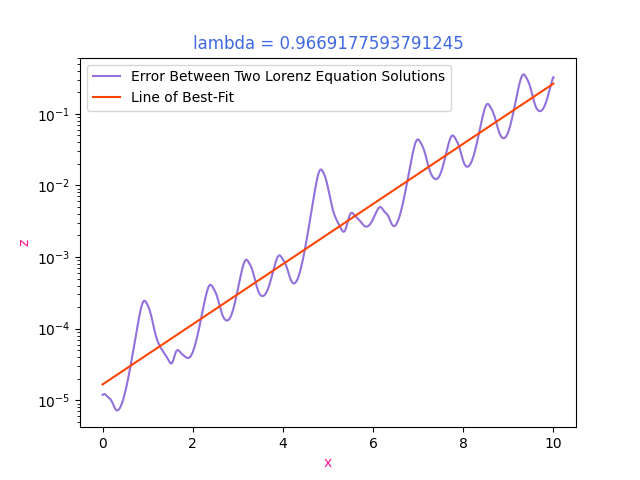

In [10]:
#produce an init condt that already lies on the attractor: one of the solutions where the other solutions tend to go to it
#so since we want an attractor: we set the initial condition w/ solve_ivp
x0_dummy = solve_ivp(lorenz, (0, 5), np.random.uniform(-15, 15, size = 3), 
                    max_step = 0.1).y[:, -1]  #want the endpoint of that sol to be the initial condt
x0_2 = x0_dummy + np.random.randn(3)*(1e-5) #want make 2nd init condt by adding small pertubation to the 1st like did before

#define time domain:
t_span = (0, 10) 

#find 2 solutions for both init conditions:
sol_1 = solve_ivp(lorenz, t_span, x0_dummy, max_step = 0.01)
sol_2 = solve_ivp(lorenz, t_span, x0_2, max_step = 0.01)

#compute norm of delta by taking norm of vector difference btw 2 solutions for each value of t:
del_norm = [np.linalg.norm(y) for y in sol_2.y.T - sol_1.y.T]

#use scipy.stats.linregress to calculate best-fit line for log of delta norm against t:
T = np.linspace(0, 10, 1002)  #linear regression function needs a linspace to do it over
linear_regress = linregress(T, np.log(del_norm))
a, b = linear_regress.slope, linear_regress.intercept  #get a,b values from linear regression did

#use plt.semilogy to get plot similar to fig 6.3 in lab manual: want plot linear regression line and the delta norm
fig = plt.figure()
ax = plt.axes()

plt.semilogy(T, del_norm, label = "Error Between Two Lorenz Equation Solutions", color = "mediumpurple")
plt.semilogy(T, np.exp(a*T+b), label = "Line of Best-Fit", color = "orangered")

ax.set_xlabel("Time", color = "royalblue")
ax.set_ylabel("Separation", color = "royalblue")
plt.title("lambda = " + str(a), color = "royalblue")
plt.legend(loc = "best")

plt.show()